# EX2 -  O Peso de Turingópolis

**Autor:** Pedro Gherardi

**Dataset:** https://drive.google.com/file/d/1kyzjDGKdOnWx5F0w8sGMlTrOXhvQ-ivy/view?usp=sharing

Descrição do Dataset:

1.SEX: Sexo;

2.AGE: Idade;

3.HEIGHT: Altura;

4.WEIGHT: Peso;


## Setup

Importa as principais bibliotecas e dataframe que serão utilizadas para análise 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "J:\Faculdade\Turing USP\TA\Entregáveis\entregavel_2\dataset2.xls - dataset2.xls.csv" #caminho do arquivo no meu PC, substituir pelo seu
df = pd.read_csv(path)    #dataframe

In [5]:
df.head() 

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


## Item A:

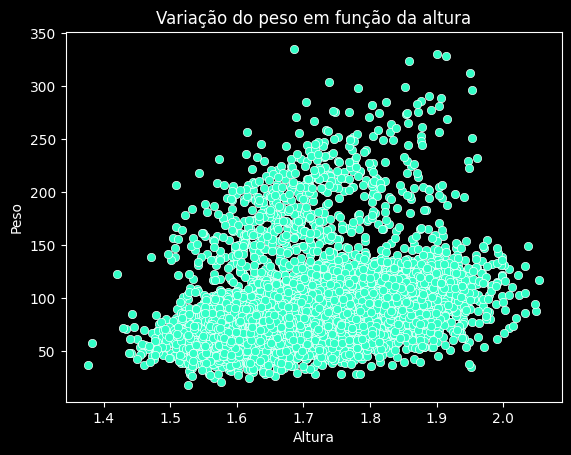

In [7]:
sns.scatterplot(data=df, x="height", y="weight", color='#33FFC7')
plt.ylabel("Peso", size=10)
plt.xlabel("Altura", size=10)
plt.title("Variação do peso em função da altura", size=12)
plt.show()

A partir do gráfico, observamos a distribuição do peso em função da altura do indivíduo, dessa forma, é possível verificar onde está a maior concentração de peso e altura da população, bem como o número de pessoas que possuem peso e altura de grande ou baixa magnitude em relação a maioria da população.

Analisando o gráfico, é possível perceber pontos de dados com valores fora do esperado (como por exemplo pessoas acima dos 300kg, acima de 2.0 metros de altura, ou abaixo de 1.4 metros de altura). Esses dados unusuais deles são outliers.

Outra fato unusual deste gráfico que podemos realizar é que o peso de grande parte da população encontrasse elevado em comparação a suia altura o que indica que essa população possui em grande parte um IMC elevado e altos índices de obesidade.

## Item B:

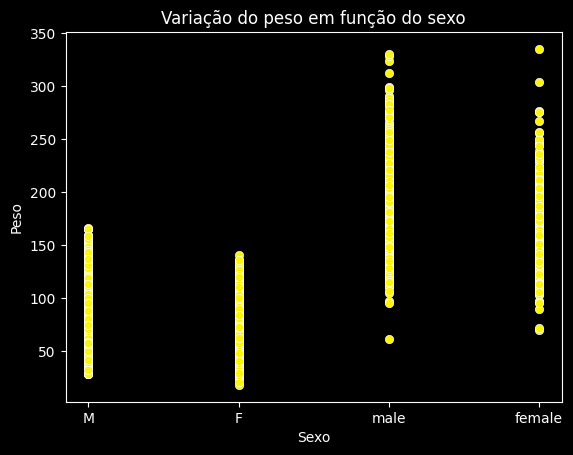

In [8]:
sns.scatterplot(data=df, x="sex", y="weight", color='#FBF40F') 
plt.ylabel("Peso", size=10)
plt.xlabel("Sexo", size=10)
plt.title("Variação do peso em função do sexo", size=12)
plt.show()

Aqui podemos identificar o problemas nas features em que duas categorias foram representadas de quartro formas diferentes

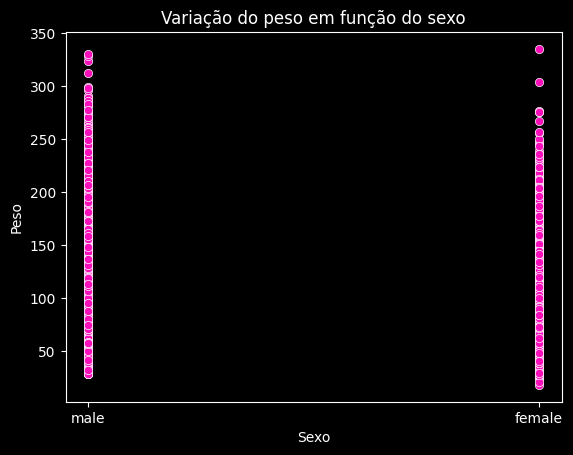

In [9]:
# Substitui "M" por "male".
df["sex"].replace("M", "male", inplace=True)

# Substitui "F" e "female".
df["sex"].replace("F", "female", inplace=True)

sns.scatterplot(data=df, x="sex", y="weight", color='#FB0FBB')
plt.ylabel("Peso", size=10)
plt.xlabel("Sexo", size=10)
plt.title("Variação do peso em função do sexo", size=12)
plt.show()

## Item C:

In [10]:
for i in df: #Calculo do IMC da população
    IMC = df['weight'] / (df['height']**2)
df['IMC'] = IMC #Nova Coluna com os IMCs calculados
df.head()

,sex,age,height,weight,IMC
0,male,62,1.874021,114.384199,32.569938
1,female,44,1.672676,76.031332,27.174950
2,female,49,1.587970,46.403086,18.401889
3,female,25,1.653451,104.352744,38.169932
4,male,65,1.744867,76.831890,25.235778


## Item D:

**Outliers Univariados:** Dados incomuns (fora do padrão) a uma variável (dimensão únida) <br>
**Outliers Multivariados:** Dados incomuns (fora do padrão) a mais de uma variável (n-dimensões)

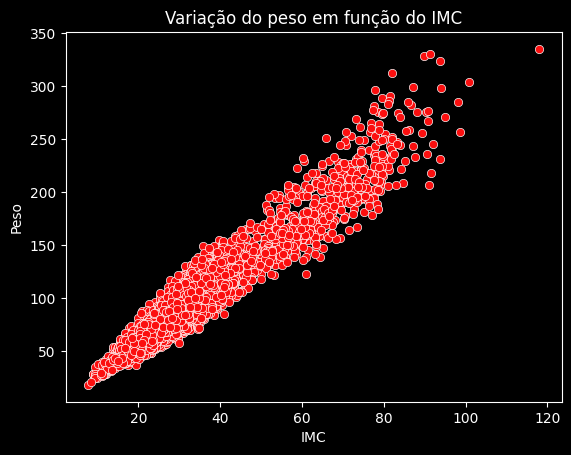

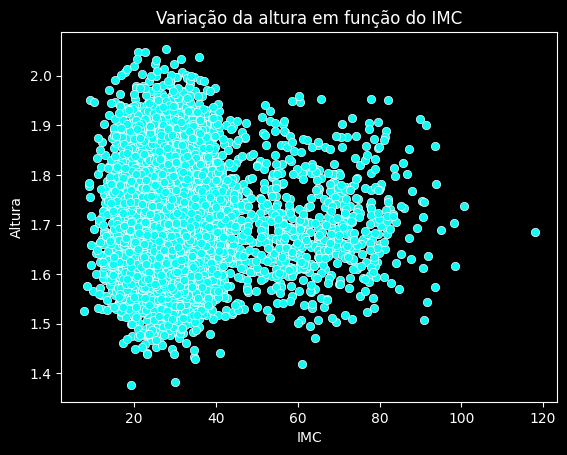

In [11]:
sns.scatterplot(data=df, x="IMC", y="weight", color='#FB0F0F')
plt.ylabel("Peso", size=10)
plt.xlabel("IMC", size=10)
plt.title("Variação do peso em função do IMC", size=12)
plt.show()

sns.scatterplot(data=df, x="IMC", y="height", color='#0FFBF4')
plt.ylabel("Altura", size=10)
plt.xlabel("IMC", size=10)
plt.title("Variação da altura em função do IMC", size=12)
plt.show()

É possível idenficar um outlier multivariado em ambos os gráficos, ou seja, os valores de IMC e Peso deste ponto de dado estão muito acima dos outros pontos apresentados sendo um valor fora do padrão.
O critério lógico adotado para remoção deste outlier será considerar IMC <= 100.

In [12]:
max = df['IMC'].quantile(0.9999) #Valor máximo definido. (99.99% da população)
print(max)
df[df['IMC']>max] #Análise do 0.001%

100.77361951278392


,sex,age,height,weight,IMC
987,female,40,1.685739,335.295817,117.990575


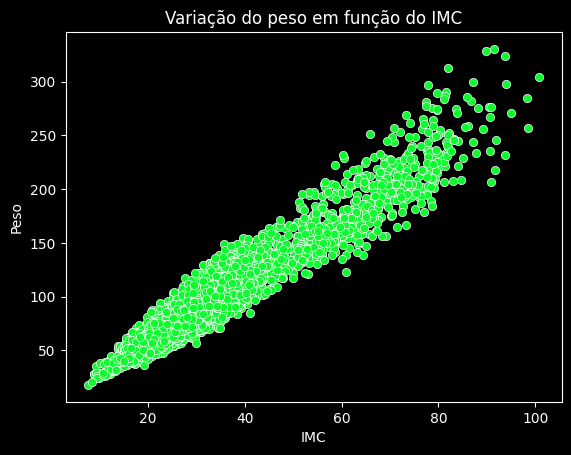

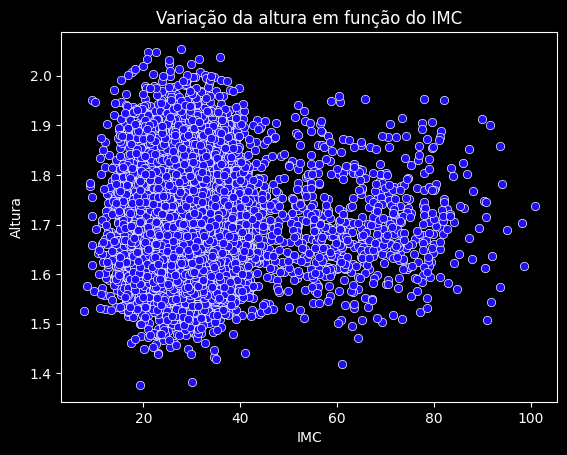

In [13]:
df = df[df['IMC']<max] #Remoção do outlier

sns.scatterplot(data=df, x="IMC", y="weight", color='#0FFB2F')
plt.ylabel("Peso", size=10)
plt.xlabel("IMC", size=10)
plt.title("Variação do peso em função do IMC", size=12)
plt.show()

sns.scatterplot(data=df, x="IMC", y="height", color='#210FFB')
plt.ylabel("Altura", size=10)
plt.xlabel("IMC", size=10)
plt.title("Variação da altura em função do IMC", size=12)
plt.show()


## Item E:

In [14]:
nao_saudaveis = df.loc[df['IMC'] > 24.9] #População com IMC acima de 24.9
print(nao_saudaveis)

         sex  age    height      weight        IMC
0       male   62  1.874021  114.384199  32.569938
1     female   44  1.672676   76.031332  27.174950
3     female   25  1.653451  104.352744  38.169932
4       male   65  1.744867   76.831890  25.235778
5     female   57  1.604690   79.076932  30.709119
...      ...  ...       ...         ...        ...
9994  female   44  1.629277   83.618157  31.500005
9995    male   68  1.999051  135.605141  33.933486
9996  female   33  1.601821  141.973080  55.332206
9997    male   25  1.926656  131.105269  35.319260
9999    male   61  1.958910  136.539595  35.581941

[7248 rows x 5 columns]


De acordo com os dados obtidos 7.248 pessoas se enquadram na condição 'não saudável'.

## Item F:

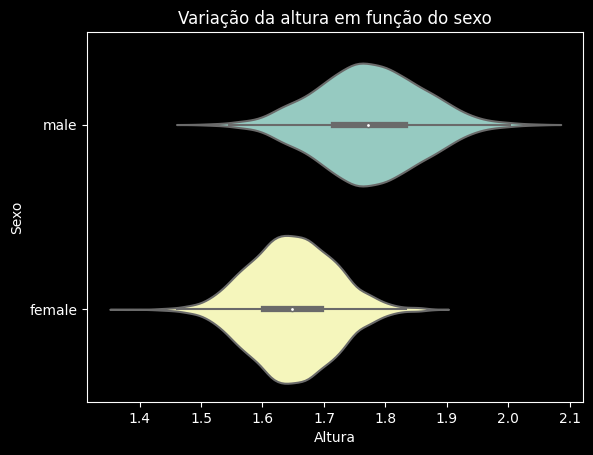

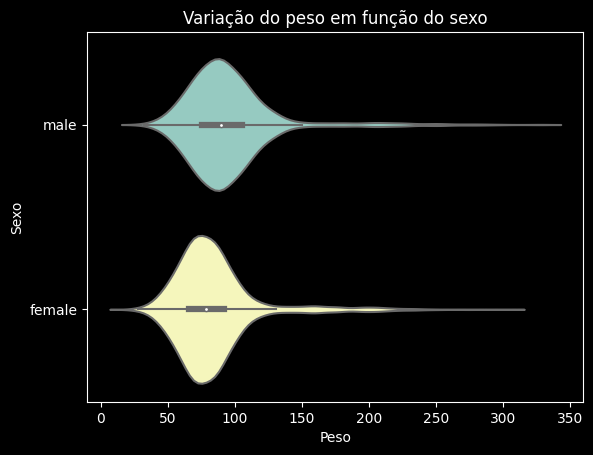

In [15]:
sns.violinplot(data=df, x="height", y="sex")
plt.xlabel("Altura", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Variação da altura em função do sexo", size=12)
plt.show()

sns.violinplot(data=df, x="weight", y="sex")
plt.xlabel("Peso", size=10)
plt.ylabel("Sexo", size=10)
plt.title("Variação do peso em função do sexo", size=12)
plt.show()

A partir dos gráficos é possível perceber que entre os sexos, (homens e mulheres) a distribuição de peso é praticamente uniforme. <br>
Em contrapartida, notamos que na distribuição de altura entre os sexos os homens tem uma altura média maior em relação as mulheres 